# Employee Attrition Prediction



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### read CSV

In [2]:
df = pd.read_csv('./hr-employee-attrition-with-null.csv', index_col=0)

### Dataset statistic

In [3]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,2.072279,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,1.105828,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,2.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,4.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


### Feature transformation

In [5]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0
string_categorical_col = ['Department', 'Attrition', 'BusinessTravel', 'EducationField', 'Gender', 'JobRole',
                              'MaritalStatus', 'Over18', 'OverTime']

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    df[col] = pd.Categorical(df[col]).codes

df = df.drop(columns = "EmployeeNumber")

# HANDLE NULL NUMBERS
# INSERT CODE HERE
for col in df.columns:
    if df[col].dtype == np.float64:
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

df = df.loc[:, ~df.columns.isin(['EmployeeNumber', 'Unnamed: 0', 'EmployeeCount', 'StandardHours', 'Over18'])]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   float64
 1   Attrition                 1470 non-null   int8   
 2   BusinessTravel            1470 non-null   int8   
 3   DailyRate                 1470 non-null   float64
 4   Department                1470 non-null   int8   
 5   DistanceFromHome          1470 non-null   float64
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   int8   
 8   EnvironmentSatisfaction   1470 non-null   float64
 9   Gender                    1470 non-null   int8   
 10  HourlyRate                1470 non-null   float64
 11  JobInvolvement            1470 non-null   float64
 12  JobLevel                  1470 non-null   float64
 13  JobRole                   1470 non-null   int8   
 14  JobSatisfacti

In [7]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.00000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,37.134354,0.161224,1.089116,798.875850,0.800680,9.375000,2.920918,1.608844,2.733844,0.268707,...,3.15051,2.694728,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,8.219370,0.367863,1.200557,363.963044,1.016742,7.360947,0.920105,1.772662,0.977519,0.772599,...,0.31993,0.978116,0.735649,6.961071,1.154166,0.630521,5.480437,3.247300,2.829301,3.163671
min,18.000000,0.000000,-1.000000,102.000000,-1.000000,1.000000,1.000000,-1.000000,1.000000,-1.000000,...,3.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,538.750000,1.000000,3.000000,2.920918,1.000000,2.000000,0.000000,...,3.00000,2.000000,0.000000,7.000000,2.000000,2.770408,4.000000,2.000000,0.000000,2.000000
50%,37.134354,0.000000,2.000000,798.875850,1.000000,9.000000,3.000000,1.000000,2.733844,0.000000,...,3.00000,2.694728,0.752551,10.000000,2.787415,3.000000,7.000000,4.290816,1.000000,4.000000
75%,41.000000,0.000000,2.000000,1084.750000,1.000000,10.000000,3.000000,3.000000,3.000000,1.000000,...,3.15051,3.000000,1.000000,12.000000,3.000000,3.000000,8.000000,7.000000,2.159014,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.00000,4.000000,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


###  Spliting data into train and test

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=42, stratify=df['Attrition'])

### Display histogram of each feature

In [10]:
def display_histogram(df, col_name, n_bin = 40, show=True):
    
    # INSERT CODE HERE
    train_col_no_nan = df.loc[~np.isnan(df[col_name]), col_name]

    # hist is the  count for each bin
    # bin_edge is the edge values of the bins
    hist, bin_edge = np.histogram(train_col_no_nan, n_bin)
    hist = hist.astype(np.float64) / len(train_col_no_nan)

    bin_edge[0] = float('-inf')
    bin_edge[-1] = float('inf')

    if show:
        # plot the histogram
        plt.title(f"Histogram of '{col_name}' column({n_bin} bins)")
        plt.grid()
        plt.fill_between(bin_edge.repeat(2)[1:-1],hist.repeat(2),facecolor='steelblue')

    return hist, bin_edge

### T4. Observe the histogram for Age, MonthlyIncome and DistanceFromHome. How many bins have zero counts? Do you think this is a good discretization? Why?

"\nthe bin that has zero counts is appear only in 'DistanceFromHome' column so this column need to calculate the less amount of bins / bigger size of bins to see the distribution easier.\nfor the rest of column, it's good discretization but not enough, because we can make smoother by increase the bin size.\n"

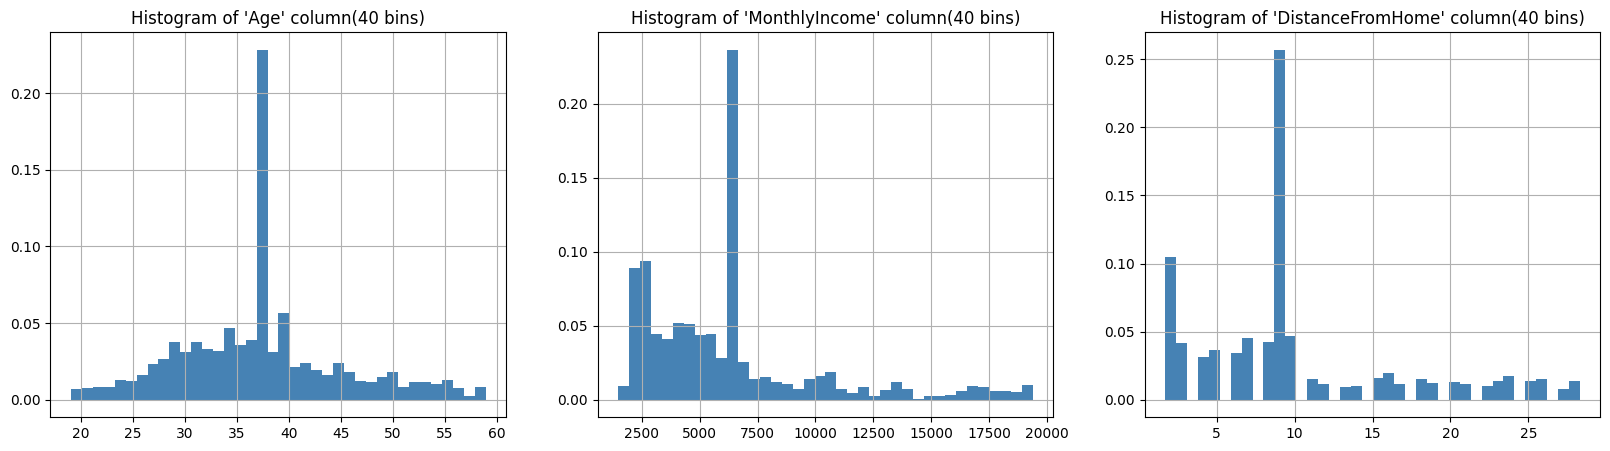

In [11]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
display_histogram(df_train, 'Age')
plt.subplot(1, 3, 2)
display_histogram(df_train, 'MonthlyIncome')
plt.subplot(1, 3, 3)
display_histogram(df_train, 'DistanceFromHome')
'''
the bin that has zero counts is appear only in 'DistanceFromHome' column so this column need to calculate the less amount of bins / bigger size of bins to see the distribution easier.
for the rest of column, it's good discretization but not enough, because we can make smoother by increase the bin size.
'''

### T5. Can we use a Gaussian to estimate this histogram? Why? What about a Gaussian Mixture Model (GMM)?

In [12]:
'''
It's not good to fit with gaussian estimation because it's obviously show that there are not only 1 guassian distribution and some column such 'MonthlyIncome' might 
not form by guassian distribution 
'''

"\nIt's not good to fit with gaussian estimation because it's obviously show that there are not only 1 guassian distribution and some column such 'MonthlyIncome' might \nnot form by guassian distribution \n"

### T6. Now plot the histogram according to the method described above (with 10, 40, and 100 bins) and show 3 plots each for Age, MonthlyIncome, and DistanceFromHome. Which bin size is most sensible for each features? Why?

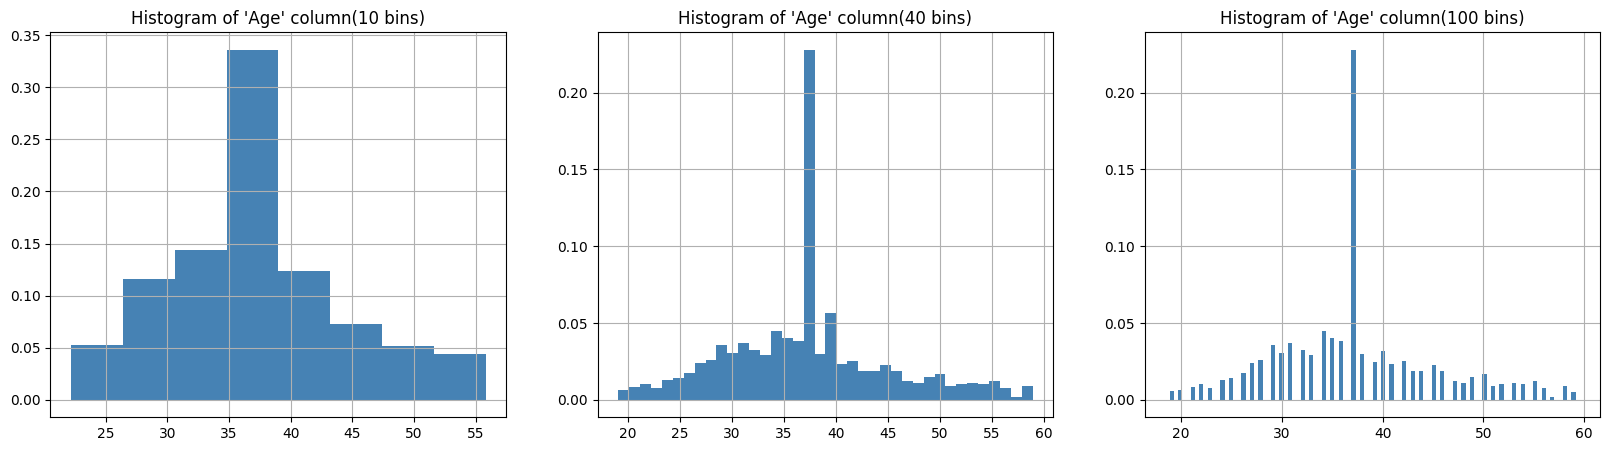

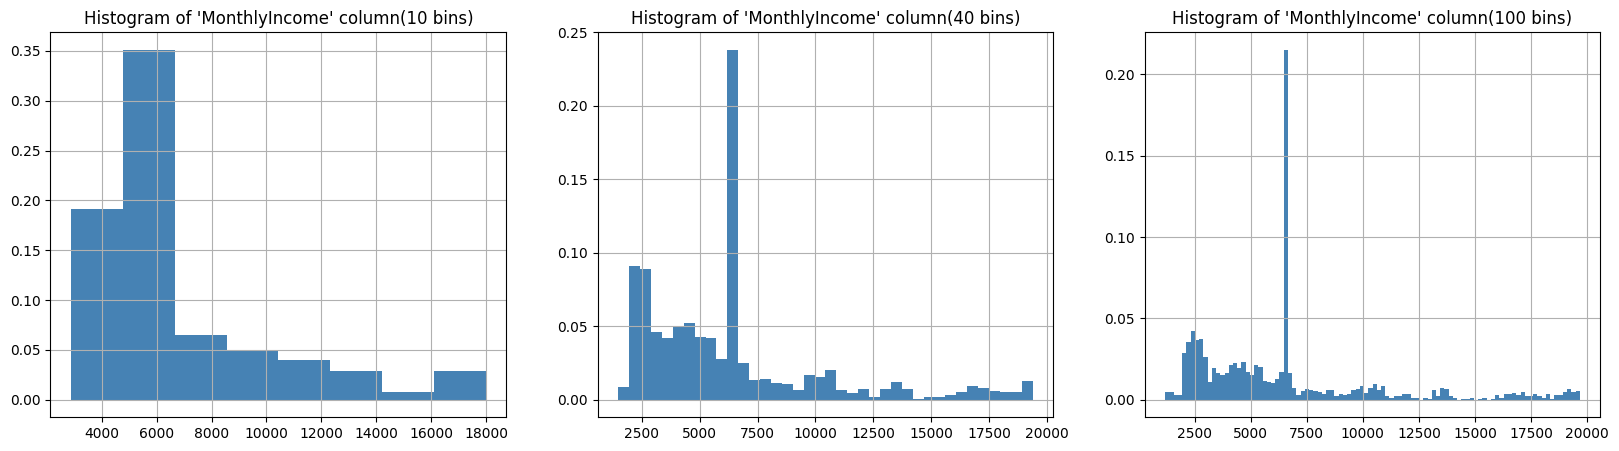

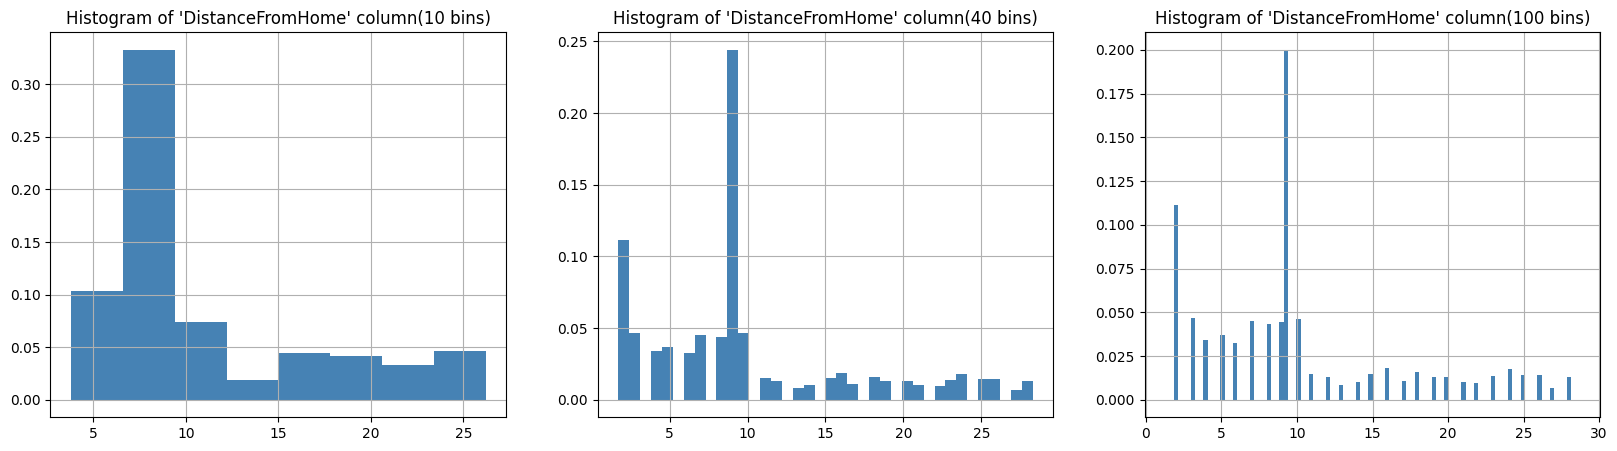

"\nFor each column\n'Age'\n    - 40 bins bs. no bin has no 0-member bin and 100 bins has a lot of 0-member bins\n'MonthlyIncome' \n    - 40 bins for the same reasons as the 'Age' column\n'DistanceFromHome' \n    - 10 bins bs. 40 bins appear 0-member bins \n"

In [13]:
n_bins = [10, 40, 100]
for col in ['Age', 'MonthlyIncome', 'DistanceFromHome']:
    plt.figure(figsize=(20, 5))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        display_histogram(df, col, n_bins[i])
    plt.show()
'''
For each column
'Age'
    - 40 bins bs. no bin has no 0-member bin and 100 bins has a lot of 0-member bins
'MonthlyIncome' 
    - 40 bins for the same reasons as the 'Age' column
'DistanceFromHome' 
    - 10 bins bs. 40 bins appear 0-member bins 
'''

### T7. For the rest of the features, which one should be discretized in order to be modeled by histograms? What are the criteria for choosing whether we should discretize a feature or not? Answer this and discretize those features into 10 bins each. In other words, figure out the bin edge for each feature, then use digitize() to convert the features to discrete values

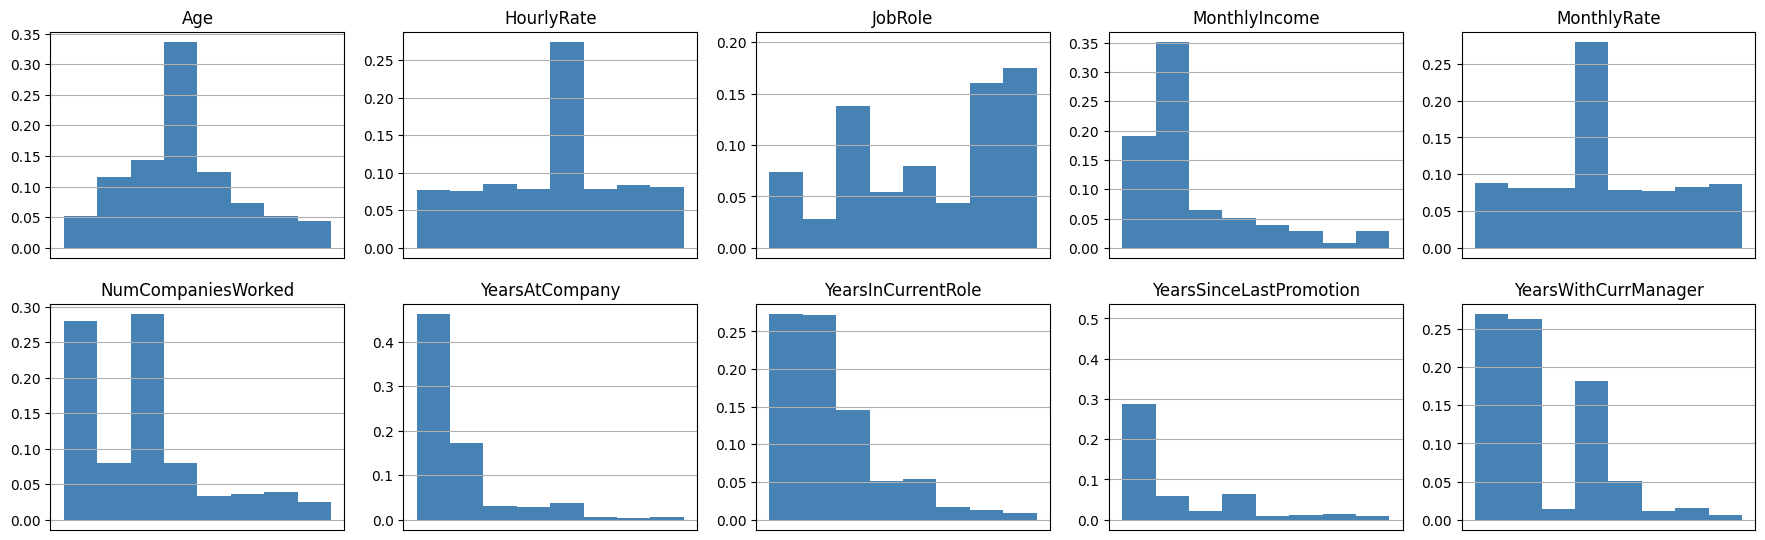

['Age', 'DailyRate', 'DistanceFromHome', 'EducationField', 'Gender', 'HourlyRate', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'RelationshipSatisfaction', 'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


'\nThe criteria\n    1. the unique value is more than or equal to 10\n'

In [14]:
col_list = df.columns.to_list()
col_list.remove('Attrition')

idx = 1
plt.figure(figsize=(22, 10))
for _, col in enumerate(col_list):
    if len(df[col].unique()) < 10:
        col_list.remove(col)
        continue
    plt.subplot(3, 5, idx)
    display_histogram(df, col, 10)
    plt.xticks([])
    plt.title(col)

    idx += 1

plt.show()
print(col_list)
'''
The criteria
    1. the unique value is more than or equal to 10
'''

### T8. What kind of distribution should we use to model histograms? (Answer a distribution name) What is the MLE for the likelihood distribution? (Describe how to do the MLE). Plot the likelihood distributions of MonthlyIncome, JobRole, HourlyRate, and MaritalStatus for different Attrition values.

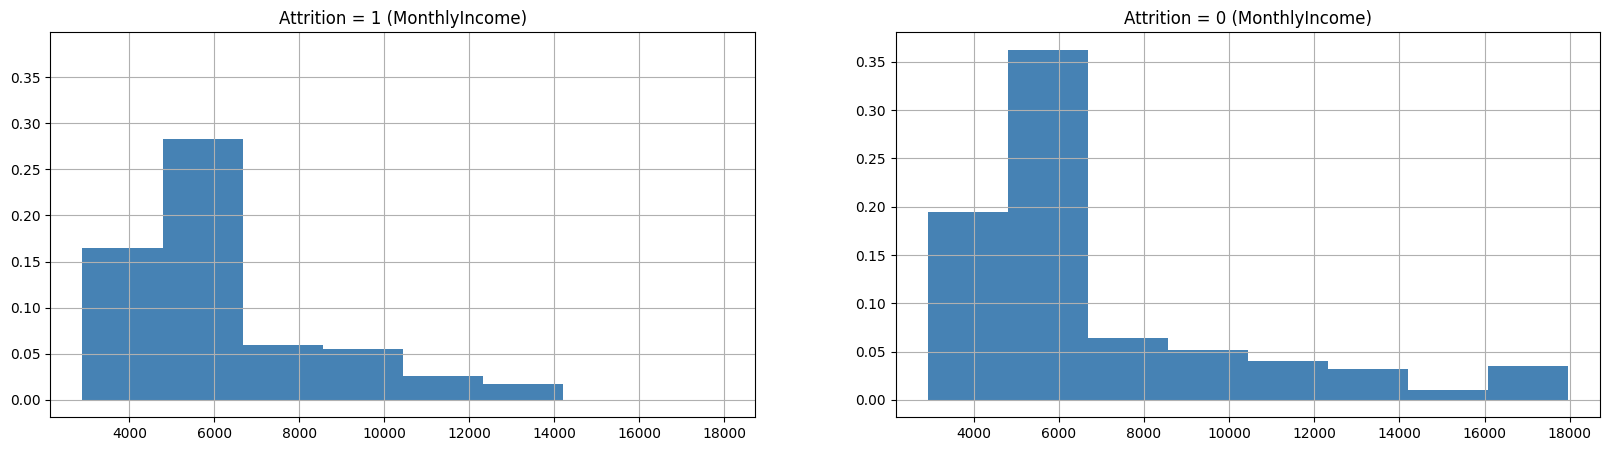

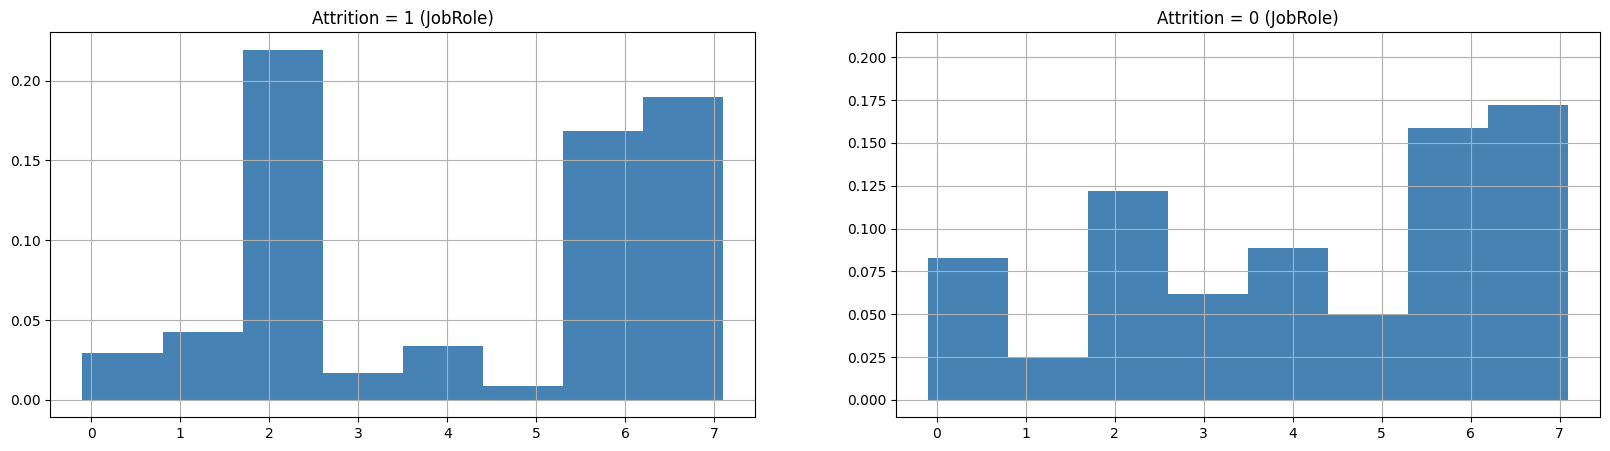

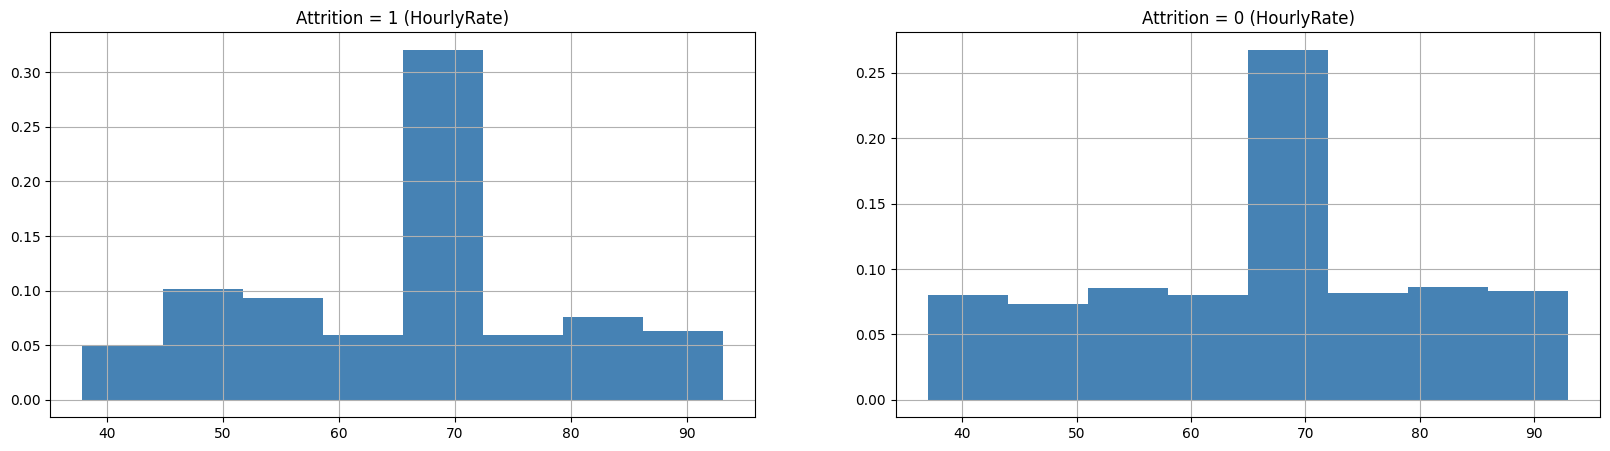

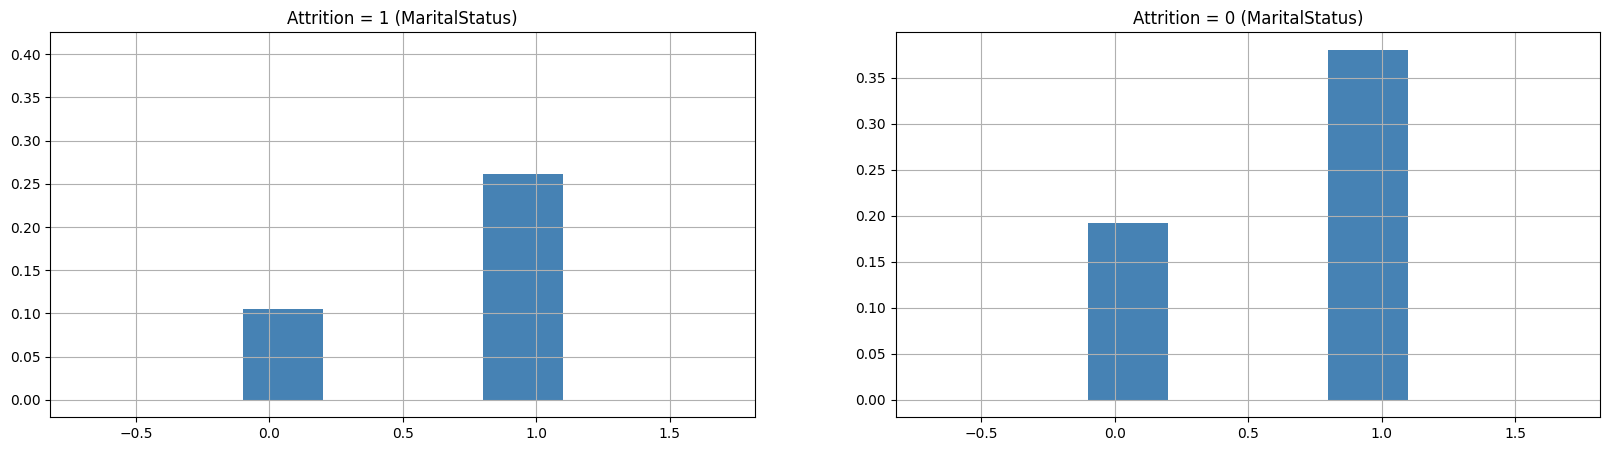

'\nfrom the data given, I choose Exponential distribution.\np(x|\\lambda) = \\lambda * exp(-\\lambda x)\n\nThe process to find MLE is\n1. find log likelihood prob for each feature\n2. multiply each prob (markov chain property)\n3. find the derivative of log likelihood prob\n4. set the derivative to zero and solve for \\lambda\n5. BAM!!\n'

In [16]:
for col in ['MonthlyIncome', 'JobRole', 'HourlyRate', 'MaritalStatus']:
    plt.figure(figsize=(20, 5))
    leave_df = df.loc[df['Attrition'] == 1]
    stay_df = df.loc[df['Attrition'] == 0]

    plt.subplot(1, 2, 1)
    display_histogram(leave_df, col, 10)
    plt.title(f'Attrition = 1 ({col})')

    plt.subplot(1, 2, 2)
    display_histogram(stay_df, col, 10)
    plt.title(f'Attrition = 0 ({col})')

    plt.show()
'''
from the data given, I choose Exponential distribution.
p(x|\lambda) = \lambda * exp(-\lambda x)

The process to find MLE is
1. find log likelihood prob for each feature
2. multiply each prob (markov chain property)
3. find the derivative of log likelihood prob
4. set the derivative to zero and solve for \lambda
5. BAM!!
'''

### T9. What is the prior distribution of the two classes?

<Axes: xlabel='Attrition'>

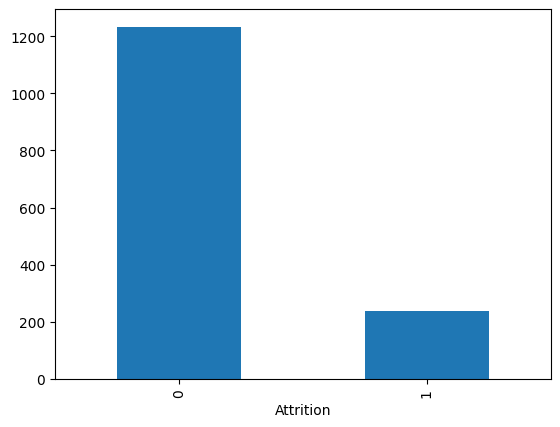

In [ ]:
label = df['Attrition']

label.value_counts().plot(kind='bar')

In [ ]:
leave_prior = label.value_counts()[1] / len(label)
stay_prior = label.value_counts()[0] / len(label)

print(f"Leave prior: {leave_prior:.2f}")
print(f"Stay prior: {stay_prior:.2f}")

Leave prior: 0.16
Stay prior: 0.84


### T10. If we use the current Naive Bayes with our current Maximum Likelihood Estimates, we will find that some P (x i |attrition) will be zero and will result in the entire product term to be zero. Propose a method to fix this problem.

### T11. Implement your Naive Bayes classifier. Use the learned distributions to classify the test set. Don’t forget to allow your classifier to handle missing values in the test set. Report the overall Accuracy. Then, report the Precision, Recall, and F score for detecting attrition. See Lecture 1 for the definitions of each metric.


In [ ]:
from SimpleBayesClassifier import SimpleBayesClassifier

In [ ]:
test_size = 0.2

X = df_train.drop(columns=['Attrition']).to_numpy()
y = df_train['Attrition'].to_numpy()

x_train, x_test = X[:-int(len(X) * test_size)], X[-int(len(X) * test_size):]
y_train, y_test = y[:-int(len(y) * test_size)], y[-int(len(y) * test_size):]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1059, 30) (264, 30) (1059,) (264,)


In [ ]:
model = SimpleBayesClassifier(n_pos = (y_train==1).sum(),
                              n_neg = (y_train==0).sum())

model.prior_pos, model.prior_neg

(0.15675165250236073, 0.8432483474976393)

In [ ]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """

    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (3/8, 5/8)
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0, 1)
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1, 0)

check_prior()

In [ ]:
model.fit_params(x_train, y_train)

([(array([0.01567749, 0.03919373, 0.11198208, 0.13661814, 0.34490482,
          0.13549832, 0.07726764, 0.06382979, 0.04927212, 0.02575588]),
   array([-inf, 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8,  inf])),
  (array([0.20044793, 0.        , 0.        , 0.09182531, 0.        ,
          0.        , 0.14333707, 0.        , 0.        , 0.5643897 ]),
   array([-inf, -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  inf])),
  (array([0.07838746, 0.06270997, 0.0806271 , 0.10302352, 0.25979843,
          0.07950728, 0.06830907, 0.09406495, 0.09518477, 0.07838746]),
   array([  -inf,  241.7,  381.4,  521.1,  660.8,  800.5,  940.2, 1079.9,
          1219.6, 1359.3,    inf])),
  (array([0.20044793, 0.        , 0.        , 0.03695409, 0.        ,
          0.        , 0.53079507, 0.        , 0.        , 0.23180291]),
   array([-inf, -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  inf])),
  (array([0.26987682, 0.1019037 , 0.34266517, 0.07278835, 0.01903695,
          0.04

In [ ]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  0.2  0.4  0.6  0.8  1.   1.2  1.4  1.6  1.8  inf]
Feature : 1
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  inf]
Feature : 2
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  inf]
Feature : 3
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  inf]

LEAVE PARAMETERS
Feature : 0
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  inf]
Feature : 1
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  inf]
Feature : 2
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  inf]
Feature : 3
BINS : [0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
EDGES : [-inf  4.2  4.4

In [ ]:
y_pred = model.predict(x = x_test)

/Users/jirayuwat/Desktop/2110573-Pattern-Recognition/Homework_2/SimpleBayesClassifier.py:90: RuntimeWarning: divide by zero encountered in log
  h += np.log(self.leave_params[j][0][leave_bin_idx])


In [ ]:
def evaluate(y_true, y_pred, show_result = True):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    accuracy = (tp + tn) / (tp+tn+fp+fn + 1e-7)
    precision = tp / (tp + fp + 1e-7)
    recall = tp / (tp + fn + 1e-7)
    F1 = 1 / (1/(precision+1e-7) + 1/(recall+1e-7))
    fpr = fp / (fp + tn + 1e-7)

    if show_result:
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1: {F1:.2f}")
        print(f"False Positive Rate: {fpr:.2f}")

    return accuracy, precision, recall, F1, fpr

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.78
Precision: 0.39
Recall: 0.36
F1: 0.19
False Positive Rate: 0.12


(0.7840909087939049,
 0.3863636354855372,
 0.3617021268899955,
 0.1868132364569496,
 0.12442396307630232)

### T12. Use the learned distributions to classify the test set. Report the results using the same metric as the previous question.


In [ ]:
model.fit_gaussian_params(x_train, y_train)

([(37.97705700421266, 7.905210058850059),
  (1.0716685330347144, 1.2053507125719154),
  (813.3086744216164, 361.30337107093993),
  (0.793952967525196, 1.0139493737925844),
  (9.286254199328107, 7.239286067057349),
  (2.955330004342162, 0.9299288264329686),
  (1.6461366181410975, 1.7606432612944425),
  (2.7759129967776586, 0.9621600883826675),
  (0.24972004479283313, 0.7727964591752292),
  (65.5051991681331, 17.926571520462595),
  (2.7575921185943577, 0.6055016651072737),
  (2.147814444926907, 1.0057817006776044),
  (3.3404255319148937, 3.096165066141489),
  (2.7646586070038315, 0.9683518008856482),
  (0.658454647256439, 1.0307851883908996),
  (6799.815169572868, 4329.403599720594),
  (14098.799486367898, 6508.548859062132),
  (2.7143352301726957, 2.220501988738913),
  (-0.0022396416573348264, 0.6152190049850804),
  (15.23988161894097, 3.2688452662454317),
  (3.1503273761912385, 0.3190831479857689),
  (2.7172376229327115, 0.9725397873023126),
  (0.7745989213154466, 0.7081637457041506),


In [ ]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0


In [ ]:
y_pred = model.gaussian_predict(x_test)

In [ ]:
evaluate(y_test, y_pred)

Accuracy: 0.78
Precision: 0.40
Recall: 0.45
F1: 0.21
False Positive Rate: 0.15


(0.7803030300074609,
 0.3962264143467426,
 0.44680850968764146,
 0.21000004975999995,
 0.14746543772006201)

### T13 : The random choice baseline is the accuracy if you make a random guess for each test sample. Give random guess (50% leaving, and 50% staying) to the test samples. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the random choice baseline.

In [ ]:
import random


y_pred = np.array([random.randint(0, 1) for _ in range(len(y_test))])

evaluate(y_test, y_pred)

Accuracy: 0.50
Precision: 0.17
Recall: 0.45
F1: 0.12
False Positive Rate: 0.49


(0.499999999810606,
 0.16535433057846116,
 0.44680850968764146,
 0.12068971560311449,
 0.4884792624477054)

### T14. The majority rule is the accuracy if you use the most frequent class from the training set as the classification decision. Report the overall Accuracy. Then, report the Precision, Recall, and F score for attrition prediction using the majority rule baseline.



In [ ]:
unique, counts = np.unique(y_pred, return_counts=True)
max_freq = sorted([(counts[i], unique[i]) for i in range(len(unique))])[-1][1]

y_pred = np.array([max_freq for _ in range(len(y_test))])

evaluate(y_test, y_pred)

Accuracy: 0.82
Precision: 0.00
Recall: 0.00
F1: 0.00
False Positive Rate: 0.00


(0.8219696966583447, 0.0, 0.0, 5e-08, 0.0)

### T15. Compare the two baselines with your Naive Bayes classifier.


<u>note</u> random rule that used 50% so acc. is 50% but precision is very low due to random guess.
In the other hand, The majority rule give more acc. (82%) but precision and recall are very low.(near to 0) because we guess 0 for all test data.

Finally, Naive bayes give acc. 78% and medium (50%) precision and recall due to it was learned from data.

### T16. Use the following threshold values
$ t = np.arange(-5,5,0.05) $
### find the best accuracy, and F score (and the corresponding thresholds)


In [ ]:
best_acc = float('-inf')
best_acc_t = 0

best_f1 = float('-inf')
best_f1_t = 0

hist = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'FPR': []
}

for threshold in np.arange(-5, 5, 0.05):
    y_pred = model.gaussian_predict(x_test, threshold)

    print(f"Threshold: {threshold:.2f}",end='\t| ')
    eva = evaluate(y_test, y_pred, show_result=False)
    for idx, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1', 'FPR']):
        print(f"{metric}: {eva[idx]:.2f}", end='\t| ')
        hist[metric].append(eva[idx])
    print()
    if eva[0] > best_acc:
        best_acc = eva[0]
        best_acc_t = threshold
    if eva[3] > best_f1:
        best_f1 = eva[3]
        best_f1_t = threshold

print(f"Best threshold for accuracy: {best_acc_t:.2f} (Accuracy: {best_acc:.2f})")
print(f"Best threshold for F1: {best_f1_t:.2f} (F1: {best_f1:.2f})")

Threshold: -5.00	| Accuracy: 0.27	| Precision: 0.19	| Recall: 0.94	| F1: 0.16	| FPR: 0.87	| 
Threshold: -4.95	| Accuracy: 0.27	| Precision: 0.19	| Recall: 0.94	| F1: 0.16	| FPR: 0.87	| 
Threshold: -4.90	| Accuracy: 0.27	| Precision: 0.19	| Recall: 0.94	| F1: 0.16	| FPR: 0.87	| 
Threshold: -4.85	| Accuracy: 0.28	| Precision: 0.19	| Recall: 0.94	| F1: 0.16	| FPR: 0.87	| 
Threshold: -4.80	| Accuracy: 0.29	| Precision: 0.19	| Recall: 0.94	| F1: 0.16	| FPR: 0.85	| 
Threshold: -4.75	| Accuracy: 0.29	| Precision: 0.19	| Recall: 0.94	| F1: 0.16	| FPR: 0.85	| 
Threshold: -4.70	| Accuracy: 0.29	| Precision: 0.19	| Recall: 0.94	| F1: 0.16	| FPR: 0.85	| 
Threshold: -4.65	| Accuracy: 0.28	| Precision: 0.19	| Recall: 0.91	| F1: 0.16	| FPR: 0.85	| 
Threshold: -4.60	| Accuracy: 0.29	| Precision: 0.19	| Recall: 0.91	| F1: 0.16	| FPR: 0.85	| 
Threshold: -4.55	| Accuracy: 0.29	| Precision: 0.19	| Recall: 0.91	| F1: 0.16	| FPR: 0.85	| 
Threshold: -4.50	| Accuracy: 0.29	| Precision: 0.19	| Recall: 0.91	| F

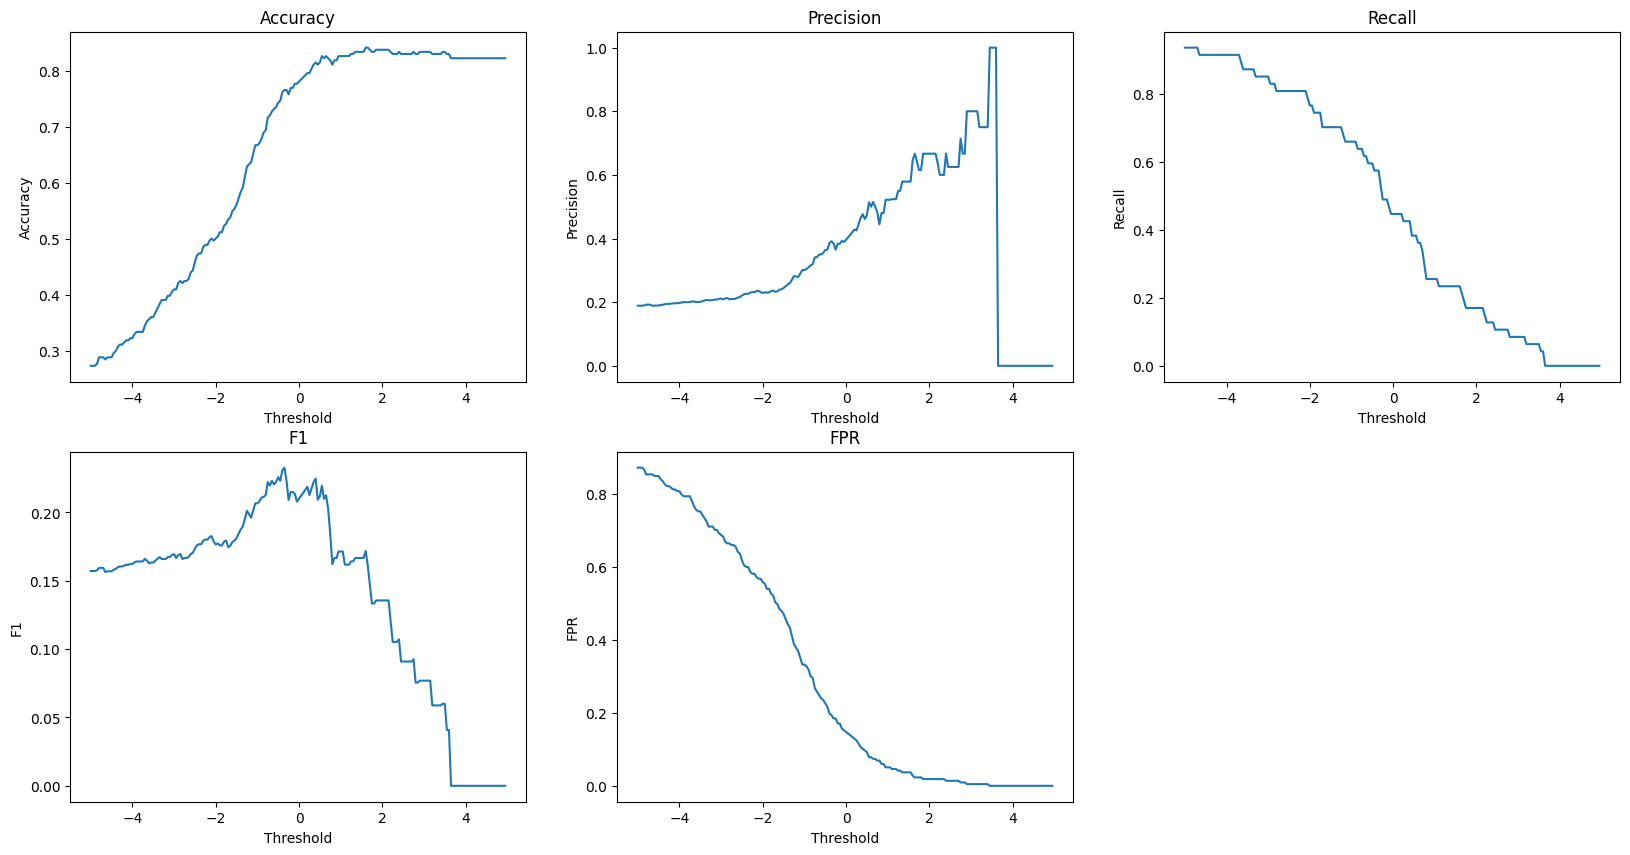

In [ ]:
plt.figure(figsize=(20, 10))
for idx, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1', 'FPR']):
    plt.subplot(2, 3, idx+1)
    plt.plot(np.arange(-5, 5, 0.05), hist[metric])
    plt.title(metric)
    plt.xlabel('Threshold')
    plt.ylabel(metric)
plt.show()

### T17. Plot the RoC of your classifier.

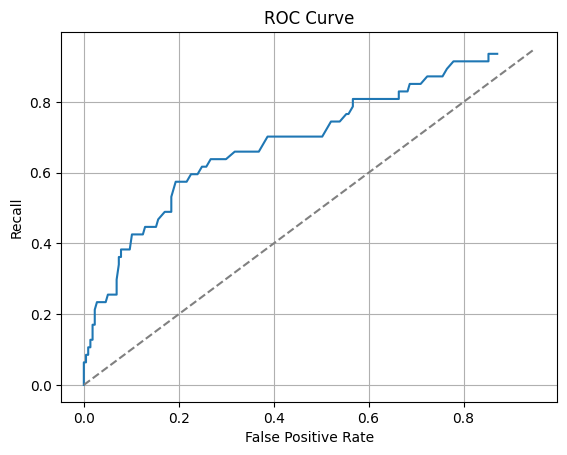

In [ ]:
plt.plot(hist['FPR'], hist['Recall'])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')

plt.plot(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05), linestyle='--', color='gray')
plt.grid()

### T18. Change the number of discretization bins to 5. What happens to the RoC curve? Which discretization is better? The number of discretization bins can be considered as a hyperparameter, and must be chosen by comparing the final performance.


In [ ]:
model.fit_params(x_train, y_train, 5)

best_acc_bin5 = float('-inf')
best_acc_t_bin5 = 0

best_f1_bin5 = float('-inf')
best_f1_t_bin5 = 0

hist_bin5 = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'FPR': []
}

for threshold in np.arange(-5, 5, 0.05):
    y_pred = model.predict(x_test, threshold)

    print(f"Threshold: {threshold:.2f}",end='\t| ')
    eva = evaluate(y_test, y_pred, show_result=False)
    for idx, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1', 'FPR']):
        print(f"{metric}: {eva[idx]:.2f}", end='\t| ')
        hist_bin5[metric].append(eva[idx])
    print()
    if eva[0] > best_acc_bin5:
        best_acc_bin5 = eva[0]
        best_acc_t_bin5 = threshold
    if eva[3] > best_f1_bin5:
        best_f1_bin5 = eva[3]
        best_f1_t_bin5 = threshold

print(f"Best threshold for accuracy: {best_acc_t_bin5:.2f} (Accuracy: {best_acc_bin5:.2f})")
print(f"Best threshold for F1: {best_f1_t_bin5:.2f} (F1: {best_f1_bin5:.2f})")

Threshold: -5.00	| Accuracy: 0.37	| Precision: 0.21	| Recall: 0.89	| F1: 0.17	| FPR: 0.74	| 
Threshold: -4.95	| Accuracy: 0.37	| Precision: 0.20	| Recall: 0.87	| F1: 0.17	| FPR: 0.73	| 
Threshold: -4.90	| Accuracy: 0.39	| Precision: 0.21	| Recall: 0.87	| F1: 0.17	| FPR: 0.71	| 
Threshold: -4.85	| Accuracy: 0.40	| Precision: 0.21	| Recall: 0.87	| F1: 0.17	| FPR: 0.71	| 
Threshold: -4.80	| Accuracy: 0.40	| Precision: 0.21	| Recall: 0.87	| F1: 0.17	| FPR: 0.70	| 
Threshold: -4.75	| Accuracy: 0.41	| Precision: 0.21	| Recall: 0.87	| F1: 0.17	| FPR: 0.70	| 
Threshold: -4.70	| Accuracy: 0.42	| Precision: 0.22	| Recall: 0.87	| F1: 0.17	| FPR: 0.68	| 
Threshold: -4.65	| Accuracy: 0.42	| Precision: 0.22	| Recall: 0.87	| F1: 0.18	| FPR: 0.67	| 
Threshold: -4.60	| Accuracy: 0.42	| Precision: 0.22	| Recall: 0.87	| F1: 0.18	| FPR: 0.67	| 
Threshold: -4.55	| Accuracy: 0.43	| Precision: 0.22	| Recall: 0.87	| F1: 0.18	| FPR: 0.66	| 
Threshold: -4.50	| Accuracy: 0.45	| Precision: 0.23	| Recall: 0.87	| F

In [ ]:
model.fit_params(x_train, y_train, 10)

best_acc_bin10 = float('-inf')
best_acc_t_bin10 = 0

best_f1_bin10 = float('-inf')
best_f1_t_bin10 = 0

hist_bin10 = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1': [],
    'FPR': []
}

for threshold in np.arange(-5, 5, 0.05):
    y_pred = model.predict(x_test, threshold)

    print(f"Threshold: {threshold:.2f}",end='\t| ')
    eva = evaluate(y_test, y_pred, show_result=False)
    for idx, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1', 'FPR']):
        print(f"{metric}: {eva[idx]:.2f}", end='\t| ')
        hist_bin10[metric].append(eva[idx])
    print()
    if eva[0] > best_acc_bin10:
        best_acc_bin10 = eva[0]
        best_acc_t_bin10 = threshold
    if eva[3] > best_f1_bin10:
        best_f1_bin10 = eva[3]
        best_f1_t_bin10 = threshold

print(f"Best threshold for accuracy: {best_acc_t_bin10:.2f} (Accuracy: {best_acc_bin10:.2f})")
print(f"Best threshold for F1: {best_f1_t_bin10:.2f} (F1: {best_f1_bin10:.2f})")

Threshold: -5.00	| Accuracy: 0.45	| Precision: 0.23	| Recall: 0.87	| F1: 0.18	| FPR: 0.64	| 
Threshold: -4.95	| Accuracy: 0.46	| Precision: 0.23	| Recall: 0.87	| F1: 0.18	| FPR: 0.63	| 
Threshold: -4.90	| Accuracy: 0.47	| Precision: 0.23	| Recall: 0.87	| F1: 0.18	| FPR: 0.62	| 
Threshold: -4.85	| Accuracy: 0.47	| Precision: 0.23	| Recall: 0.87	| F1: 0.18	| FPR: 0.62	| 
Threshold: -4.80	| Accuracy: 0.47	| Precision: 0.23	| Recall: 0.85	| F1: 0.18	| FPR: 0.61	| 
Threshold: -4.75	| Accuracy: 0.47	| Precision: 0.23	| Recall: 0.85	| F1: 0.18	| FPR: 0.61	| 
Threshold: -4.70	| Accuracy: 0.47	| Precision: 0.23	| Recall: 0.85	| F1: 0.18	| FPR: 0.61	| 
Threshold: -4.65	| Accuracy: 0.48	| Precision: 0.23	| Recall: 0.85	| F1: 0.18	| FPR: 0.60	| 
Threshold: -4.60	| Accuracy: 0.48	| Precision: 0.23	| Recall: 0.83	| F1: 0.18	| FPR: 0.59	| 
Threshold: -4.55	| Accuracy: 0.48	| Precision: 0.23	| Recall: 0.83	| F1: 0.18	| FPR: 0.59	| 
Threshold: -4.50	| Accuracy: 0.48	| Precision: 0.23	| Recall: 0.83	| F

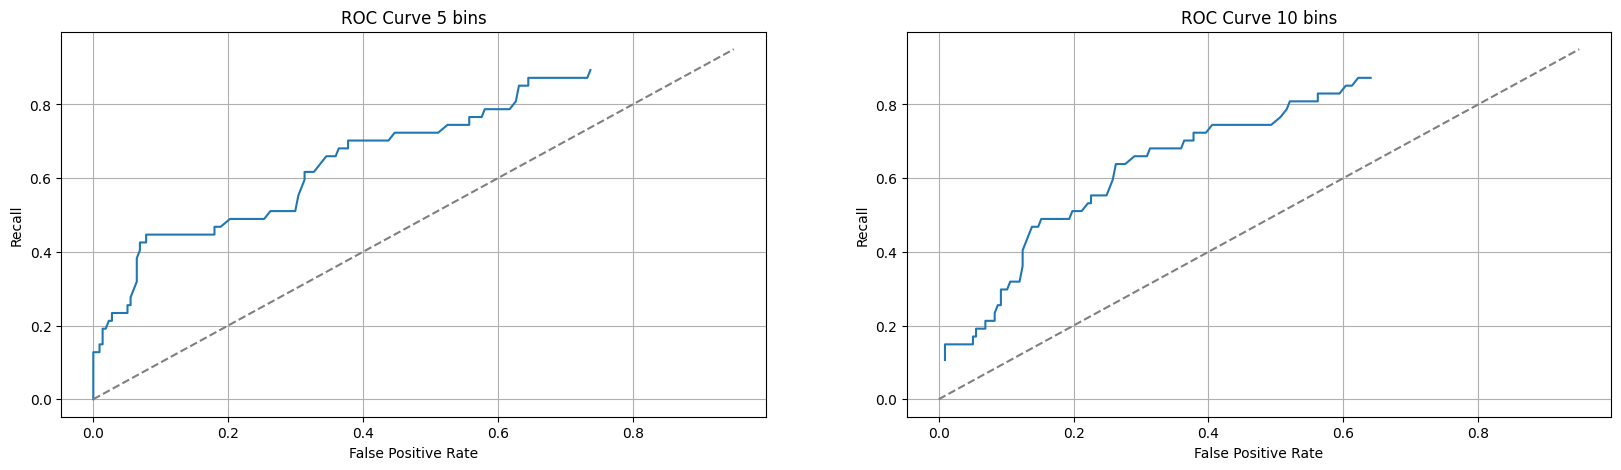

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)

plt.plot(hist_bin5['FPR'], hist_bin5['Recall'])
plt.title('ROC Curve 5 bins')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')

plt.plot(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05), linestyle='--', color='gray')
plt.grid()

plt.subplot(1, 2, 2)

plt.plot(hist_bin10['FPR'], hist_bin10['Recall'])
plt.title('ROC Curve 10 bins')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall')

plt.plot(np.arange(0, 1, 0.05), np.arange(0, 1, 0.05), linestyle='--', color='gray')
plt.grid()